In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from predecon import PreDeCon

import os
import sys

# path = os.getcwd()
# ROOT_DIR = os.path.dirname(path)
base_path = os.path.join('..','algorithm_verification','datasets')


ClusterIDs of data-points: [-1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1]


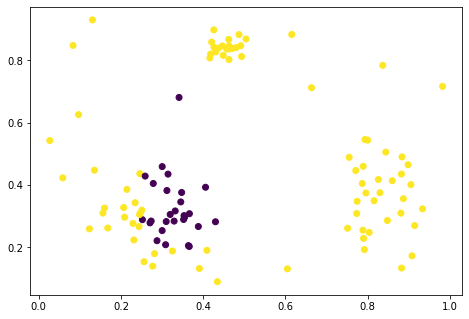

In [2]:
X = np.loadtxt(os.path.join(base_path,'multiple-gaussian-2d_unlabeled.csv'), delimiter =' ')
    
predecon = PreDeCon(minPts=5, eps=0.75, delta = 0.25, lambda_ = 1, kappa = 100)
predecon.fit(X)

print("\nClusterIDs of data-points:", predecon.labels)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x=X[:,0],y=X[:,1],c=predecon.labels)
plt.show()

In [ ]:
# Exercise 2 Dataset

X = np.array([
    [0, 3],
    [1, 3], # p_2
    [2, 3], # p_3
    [3, 3],
    [4, 3],
    [5, 3], # p_6
    [6, 5],
    [6, 4],
    [6, 3],
    [6, 2],
    [6, 1],
    [6, 0]
])
print(X, '\n', X.shape)

predecon = PreDeCon()
predecon.fit(X)

p2 = X[1]
p3 = X[2]
p6 = X[5]
p9 = X[8]

N_p3 = predecon._neighborhood_of_point(p3)
print("p3:   ", p3)
print("N(p3):", N_p3)

var_A0 = predecon._variance_along_attribute(p3, 0)
var_A1 = predecon._variance_along_attribute(p3, 1)
print("VAR_A0 for p3's neighborhood:", var_A0)
print("VAR_A1 for p3's neighborhood:", var_A1)

print("w_p3:", predecon._subspace_preference_vector(p3))
print("w_p6:", predecon._subspace_preference_vector(p6))

print("PDim for p3:", predecon._subspace_preference_dimensionality(p3))
print("PDim for p6:", predecon._subspace_preference_dimensionality(p6))

dist = predecon._preference_weighted_similarity_measure
print("dist(p6, p9) =", dist(p6, p9))
print("dist(p9, p6) =", dist(p9, p6))

dist_pref = predecon._general_preference_weighted_similarity_measure
print("dist_pref(p6, p9) =", dist_pref(p6, p9))

print("N_w for p3:", predecon._pref_neighborhood_of_point(p3), sep='\n')
print("N_w for p6:", predecon._pref_neighborhood_of_point(p6), sep='\n')

print("Is p3 a core point?", predecon._is_core_point(p3))
print("Is p6 a core point?", predecon._is_core_point(p6))

print("Is p2 directly preference weighted reachable from p3?", predecon._is_directly_preference_weighted_reachable(p3,p2))
print("Is p6 directly preference weighted reachable from p3?", predecon._is_directly_preference_weighted_reachable(p3,p6))

print("\nClusterIDs of data-points: \n", predecon._cluster_of_points)
print("\nClusterIDs of data-points:", predecon.labels)
print("ID of p3:", predecon._cluster_of_points[p3.tobytes()])
print("ID of p3:", predecon.labels[2])
print("p3 is noise: ", predecon._is_noise_point(p3))
print("ID of p6:", predecon._cluster_of_points[p6.tobytes()])
print("ID of p6:", predecon.labels[5])
print("p6 is noise: ", predecon._is_noise_point(p6))

# predecon._is_noise_point(np.array([7,0])) raises KeyError

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x=X[:,0],y=X[:,1],c=predecon.labels)
plt.show()